In [33]:
#First we import the necessary libraries.
#pywt is a wavelet transformation library which I found is easier to apply than manually coding functions up.
from __future__ import print_function
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
df1 = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_yahoo.csv')
df2 = df1.iloc[:,1:]
df3 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
df1 = df3
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,2000-02-08,4.071429,4.147321,3.973214,4.102679,3.551679,102160800,3.742522,4.258182,3.226863,0.269113,0.028205,108.190228,3.824902,3.200471,3.819568,3.850447,75.462985,10.722907,3.200471
1,2000-02-09,4.075893,4.183036,4.015625,4.022321,3.482112,74841200,3.778013,4.267441,3.288585,0.261849,0.041000,99.355655,3.851224,5.999985,3.838542,3.949107,80.110416,12.344132,5.999985
2,2000-02-10,4.031250,4.066964,3.928571,4.053571,3.509166,75745600,3.825000,4.222077,3.427923,0.253030,0.053050,74.466356,3.878204,1.113564,3.842262,4.021875,83.977818,14.863993,1.113564
3,2000-02-11,4.058036,4.075893,3.866071,3.883929,3.362307,53062800,3.846429,4.205873,3.486984,0.249944,0.048354,39.741881,3.878967,-1.304587,3.837984,4.027232,62.983456,5.263174,-1.304587
4,2000-02-14,3.904018,4.138393,3.879464,4.136161,3.580663,91884800,3.873884,4.233772,3.513996,0.250586,0.064245,79.748813,3.913260,5.284110,3.855283,4.039732,94.198897,7.233800,5.284110


In [4]:
list(df1.columns)

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'bb_bbm',
 'bb_bbh',
 'bb_bbl',
 'atr',
 'macd',
 'cci',
 'ema',
 'roc',
 'sma12',
 'sma5',
 'stochastic_oscillator',
 'mtm6',
 'mtm12']

In [5]:
df1[list(df1.columns)] = df1[list(df1.columns)].apply(pd.to_numeric, errors='ignore')

In [8]:
df1 = df1.rename({'Open':'open', 'Close':'close', 'High':'high', 'Low':'low', 'Date':'date'}, axis=1)

In [9]:
df3 = df1[['open', 'high', 'low', 'close']]

In [10]:
a = df3.close.values

In [11]:
b = df3.values

In [12]:
try:
    df1 = df1.drop(['date'], axis=1)
except KeyError:
    pass
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [13]:
#df2=df2.drop(df2.index[-1])
#df1[['open','high','low','close']]=df2[['open','high','low','close']]

In [14]:
df1=df1.interpolate(method='akima')
df1.replace(np.inf, np.nan)
df1=df1.dropna(subset=['open', 'high', 'low', 'close'])

In [15]:
#df1 = df1.drop(['date'], axis=1)
close = df1['close']
#df1 = df1.drop(['close'], axis=1)
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [16]:
g = df1.values
r = g.shape[0]
n_train = 7*r//10
n_val = 3*r//20
#n1_train = 9*r//10
#train_indices = random.sample(range(r), n_train)
#test_indices = [i for i in list(range(r)) if i not in train_indices]
#train_indices.sort()
#test_indices.sort()

In [17]:
df1.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'Volume', 'bb_bbm',
       'bb_bbh', 'bb_bbl', 'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [18]:
price_cols = ['open', 'high', 'low', 'close']
price_data = df1[price_cols]
data = df1
g = data.values
pre_X_train=g[:n_train,:]
pre_X_test=g[n_train:,:]
#exp_X_train = g[n_train:n1_train,:]
#exp_X_test = g[n1_train:,:]
#h = price.values
pre_X_train.shape

(3583, 19)

In [19]:
price_train = price_data[:n_train]
price_test = price_data[n_train:]

In [20]:
price_train.head()

,open,high,low,close
0,4.071429,4.147321,3.973214,4.102679
1,4.075893,4.183036,4.015625,4.022321
2,4.031250,4.066964,3.928571,4.053571
3,4.058036,4.075893,3.866071,3.883929
4,3.904018,4.138393,3.879464,4.136161


In [21]:
#exp_y_train=h[train_indices]
#exp_y_test=h[test_indices]
print(pre_X_train.shape, pre_X_test.shape)
#print(price_train.shape, price_test.shape)

(3583, 19) (1536, 19)


In [22]:
price_test.shape

(1536, 4)

In [27]:
pre_X_train.shape

(3583, 19)

In [34]:
scaler= preprocessing.MinMaxScaler()
scaler.fit(pre_X_train)
exp_X_train=scaler.transform(pre_X_train)
exp_X_test=scaler.transform(pre_X_test)

In [35]:
coeffs= pywt.wavedec2(exp_X_train, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')

In [24]:
'''coeffs= pywt.wavedec2(price_train, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')'''

In [40]:
exp_X_train = d

In [41]:
pd.DataFrame(exp_X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.031972,0.031972,0.031307,0.031307,0.036971,0.036971,0.030182,0.030182,0.057551,0.057551,0.568788,0.568788,0.344469,0.344469,0.029617,0.029617,0.791721,0.791721,0.659438,0.659438
1,0.031972,0.031972,0.031307,0.031307,0.036971,0.036971,0.030182,0.030182,0.057551,0.057551,0.568788,0.568788,0.344469,0.344469,0.029617,0.029617,0.791721,0.791721,0.659438,0.659438
2,0.031356,0.031356,0.030345,0.030345,0.029973,0.029973,0.030334,0.030334,0.056210,0.056210,0.540322,0.540322,0.321994,0.321994,0.030304,0.030304,0.761740,0.761740,0.614070,0.614070
3,0.031356,0.031356,0.030345,0.030345,0.029973,0.029973,0.030334,0.030334,0.056210,0.056210,0.540322,0.540322,0.321994,0.321994,0.030304,0.030304,0.761740,0.761740,0.614070,0.614070
4,0.031881,0.031881,0.031976,0.031976,0.042545,0.042545,0.030832,0.030832,0.055859,0.055859,0.574485,0.574485,0.376808,0.376808,0.030665,0.030665,0.846001,0.846001,0.723110,0.723110


In [42]:
price_train = d[:,1]
len(price_train)

3584

In [393]:
price_val = price_test.iloc[:n_val,:]
price_test = price_test.iloc[n_val:,:]

In [347]:
import random

In [348]:
'''price_train = autoencoded_X_train[:,1]
exp_X_train = np.delete(exp_X_train, 1, axis=1)
exp_X_train.shape'''

'price_train = autoencoded_X_train[:,1]\nexp_X_train = np.delete(exp_X_train, 1, axis=1)\nexp_X_train.shape'

In [49]:
X_train = exp_X_train[:,2:]
print(X_train.shape)

(3584, 18)


In [50]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
y_train = price_train
print(X_train.shape, y_train.shape)

(3584, 1, 18) (3584,)


In [54]:
coeffs= pywt.wavedec2(exp_X_test, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')

In [58]:
exp_X_test = d[n_val:]
exp_X_val = d[:n_val]

In [79]:
exp_X_val = exp_X_val[:,2:]

In [80]:
exp_X_test.shape

(769, 20)

In [93]:
price_test = d[:,3]

In [94]:
price_val = price_test[:n_val]
price_test = price_test[:n_val]

In [95]:
X_val= exp_X_val.reshape((exp_X_val.shape[0],1,exp_X_val.shape[1]))
#X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
#X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_val = price_val

In [96]:
y_val.shape

(767,)

In [97]:
y_test = price_test
y_test.shape
#y_val = price_val.iloc[:,3]

(767,)

In [98]:
exp_X_test.shape

(769, 20)

In [99]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

In [140]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=100, verbose=1)
opt = Adam(learning_rate=0.001)

In [141]:
neurons=20
dropout=0.3
model1 = Sequential()
model1.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*2, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons*4, return_sequences=True, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dropout(dropout))
model1.add(LSTM(neurons, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model1.add(Dense(units=1))
model1.add(Activation('relu'))
model1.compile(loss='mse', optimizer=opt)
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 1, 20)             3120      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 20)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 40)             9760      
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 40)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 80)             38720     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 80)             0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 20)               

In [142]:
X_train.shape, y_train.shape

((3584, 1, 18), (3584,))

In [143]:
#y_val

Train on 3584 samples, validate on 767 samples
Epoch 1/1000
3584/3584 [==============================] - 1s 208us/step - loss: 0.0764 - val_loss: 0.7464
Epoch 2/1000
3584/3584 [==============================] - 0s 130us/step - loss: 0.0584 - val_loss: 0.1458
Epoch 3/1000
3584/3584 [==============================] - 0s 126us/step - loss: 0.0680 - val_loss: 0.2082
Epoch 4/1000
3584/3584 [==============================] - 0s 104us/step - loss: 0.0617 - val_loss: 0.3854
Epoch 5/1000
3584/3584 [==============================] - 0s 111us/step - loss: 0.0413 - val_loss: 0.0961
Epoch 6/1000
3584/3584 [==============================] - 0s 106us/step - loss: 0.0381 - val_loss: 0.1048
Epoch 7/1000
3584/3584 [==============================] - 0s 101us/step - loss: 0.0312 - val_loss: 0.1993
Epoch 8/1000
3584/3584 [==============================] - 0s 106us/step - loss: 0.0316 - val_loss: 0.0842
Epoch 9/1000
3584/3584 [==============================] - 0s 105us/step - loss: 0.0292 - val_loss: 0.0964

3584/3584 [==============================] - 0s 103us/step - loss: 0.0046 - val_loss: 0.0756
Epoch 78/1000
3584/3584 [==============================] - 0s 103us/step - loss: 0.0047 - val_loss: 0.0776
Epoch 79/1000
3584/3584 [==============================] - 0s 97us/step - loss: 0.0045 - val_loss: 0.0747
Epoch 80/1000
3584/3584 [==============================] - 0s 99us/step - loss: 0.0045 - val_loss: 0.0682
Epoch 81/1000
3584/3584 [==============================] - 0s 101us/step - loss: 0.0050 - val_loss: 0.0732
Epoch 82/1000
3584/3584 [==============================] - 0s 99us/step - loss: 0.0048 - val_loss: 0.0735
Epoch 83/1000
3584/3584 [==============================] - 0s 97us/step - loss: 0.0046 - val_loss: 0.0695
Epoch 84/1000
3584/3584 [==============================] - 0s 99us/step - loss: 0.0045 - val_loss: 0.0719
Epoch 85/1000
3584/3584 [==============================] - 0s 99us/step - loss: 0.0041 - val_loss: 0.0721
Epoch 86/1000
3584/3584 [==============================] 

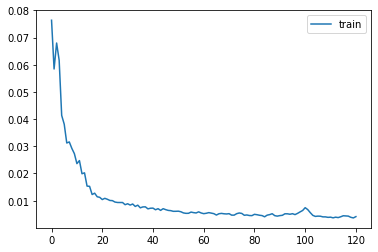

In [145]:
history=model1.fit(X_train,y_train, epochs=1000, shuffle=False, batch_size=64, verbose=1, validation_data = (X_val, y_val), callbacks=[es])
model1.save('./models/wavelet2.h5')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['rmse'], label='test')
plt.legend()
plt.show()

In [ ]:
'''coeffs= pywt.wavedec2(price_test, 'haar',  mode='symmetric',level=2)
coeffs[-1] = tuple([np.zeros_like(v) for v in coeffs[-1]])
c=pywt.waverec2(coeffs,'haar')
coeffs1=pywt.wavedec2(c,'haar', mode='symmetric', level=2)
coeffs1[-1] = tuple([np.zeros_like(v) for v in coeffs1[-1]])
d=pywt.waverec2(coeffs1, 'haar')
exp_X_test[:,0] = d[:-1,0]
exp_X_test[:,1] = d[:-1,1]
exp_X_test[:,2] = d[:1,2]
exp_X_test[:,3] = d[:-1,3]'''

In [191]:
#expXtest = exp_X_test[:,1:]

In [493]:
pd.DataFrame(autoencoded_X_train).head()

,0,1,2,3,4,5,6,7
0,0.364605,0.0,0.0,0.0,0.0,1.066508,0.0,0.0
1,0.373960,0.0,0.0,0.0,0.0,1.080561,0.0,0.0
2,0.362545,0.0,0.0,0.0,0.0,1.066226,0.0,0.0
3,0.307048,0.0,0.0,0.0,0.0,0.976932,0.0,0.0
4,0.370233,0.0,0.0,0.0,0.0,1.077817,0.0,0.0


In [234]:
#exp_X_test=encoder.predict(scaler.transform(exp_X_test))
#exp_X_test=scaler.fit_transform(exp_X_test)
#scaled_df1=pd.DataFrame(exp_X_test)
#scaled_df1.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.136990,0.0,0.202118,0.683817,0.493805,0.028984,0.139598,0.0
1,0.0,0.136976,0.0,0.202058,0.683991,0.494094,0.029204,0.139693,0.0
2,0.0,0.137027,0.0,0.202180,0.683770,0.493683,0.028912,0.139555,0.0
3,0.0,0.136968,0.0,0.202045,0.683689,0.493725,0.028966,0.139544,0.0
4,0.0,0.136922,0.0,0.201919,0.683756,0.493938,0.029127,0.139606,0.0


In [108]:
#y_test = exp_X_test[:,1]
#exp_X_test = np.delete(exp_X_test, 1, axis=1)
exp_X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))

In [119]:
X_test = (exp_X_test[:,0,2:]).reshape(exp_X_test.shape[0], 1, exp_X_test.shape[2]-2)

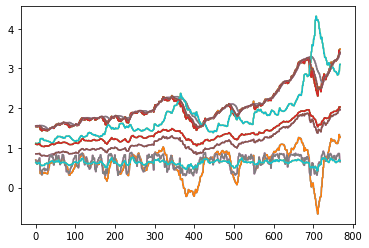

In [146]:
plt.plot(exp_X_test[:,0,:])

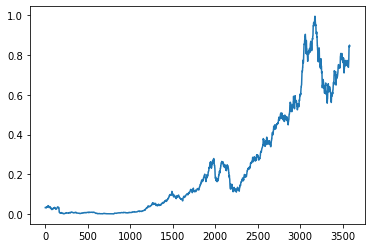

In [133]:
plt.plot(y_train)

In [120]:
y_test = price_test.iloc[:,1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [121]:
X_test.shape

(769, 1, 18)

In [147]:
pred=model1.predict(X_test)
actual= np.array(y_test)

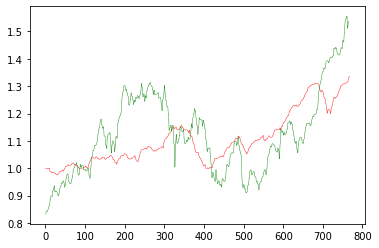

In [148]:
plt.plot(pred, color='red',linewidth=0.4)
plt.plot(actual, color='green', linewidth=0.4)
plt.savefig('./wavelet_prediction.png')
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [151]:
import math
mse = mean_squared_error(actual, pred[2:])
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred[2:])
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(0.015352698102281704, 0.1239060051098481, 0.10435384116726694)


In [153]:
def mean_absolute_percentage_error(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return(mape)

In [154]:
print(mean_absolute_percentage_error(actual, pred[2:]))

12.46972136301865


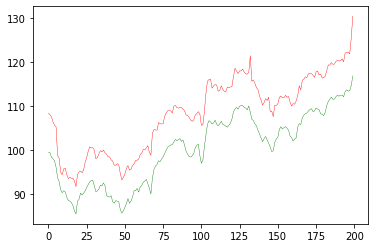

In [460]:
pred2 = pred[:200]+10
pred1 = pred[:200]
actual1 = actual[:200]
plt.plot(pred1, color='green',linewidth=0.4)
plt.plot(actual1, color='red', linewidth=0.4)

In [461]:
mse1 = mean_squared_error(actual1, pred1)
rmse1 = math.sqrt(mse)
mae1 = mean_absolute_error(actual1, pred1)
#mape = mean_absolute_percentage_error(actual, pred)
print("mse, rmse, mae:" + str((mse1,rmse1,mae1)))

mse, rmse, mae:(64.41563070081008, 128.96311720235872, 7.935655991821289)


In [312]:
pd.DataFrame(X_test[:,0,:])

,0,1,2,3,4,5,6,7
0,1.584041,1.441197,0.0,0.310625,0.0,0.0,0.848771,0.0
1,1.572980,1.462330,0.0,0.353695,0.0,0.0,0.893752,0.0
2,1.566889,1.420596,0.0,0.302216,0.0,0.0,0.833330,0.0
3,1.555019,1.410912,0.0,0.315766,0.0,0.0,0.811265,0.0
4,1.547379,1.415995,0.0,0.345240,0.0,0.0,0.843641,0.0
5,1.496791,1.736927,0.0,0.747225,0.0,0.0,1.321168,0.0
6,1.504787,1.727638,0.0,0.723081,0.0,0.0,1.315192,0.0
7,1.444277,1.989735,0.0,1.046133,0.0,0.0,1.721315,0.0
8,1.446466,1.927482,0.0,0.966422,0.0,0.0,1.659344,0.0
9,1.419958,2.020334,0.0,1.074264,0.0,0.0,1.827060,0.0
